In [6]:
import os
import random
random.seed(42) 

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Inline plots in Jupyter notebooks
%matplotlib inline

# better display of review text in dataframes
pd.set_option('display.max_colwidth', None) 

# Seaborn style
sns.set(style="whitegrid")

In [7]:
PICKLE_DIR = 'data/dataset/reviews.pickle'


print("Reading file: " + PICKLE_DIR)
allocine_df = pd.read_pickle(PICKLE_DIR)
   
print("Loaded {} reviews !".format(len(allocine_df)))

Reading file: data/dataset/reviews.pickle
Loaded 1777 reviews !


In [8]:
allocine_df.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
65,http://www.allocine.fr/film/fichefilm-261592/critiques/spectateurs,3.5,"Cette Comédie sympathique, coécrite et dirigée par Mohamed Hamidi, nous fait passer un réel bon moment. Le scénario, coécrit avec Alain-Michel Blanc (également scénariste de ""Né quelque part"" en 2012 et de ""La vache"" en 2016), nous offre une nouvelle histoire tendre et simple. Une histoire au rythme dynamique, avec de beaux personnages ; une ""belle équipe"" de filles, riche en couleurs, confrontée au machisme pitoyable de leurs détestables époux. Cette comédie sociétale a le mérite d'aborder la réinsertion ou la liberté de la femme dans un couple, le tout avec humour et émotion.<br/>Le casting nous offre un collège de comédiennes talentueuses rendant leurs personnages authentiques, avec un coup de cœur particulier pour la belle prestation de Sabrina Ouazani. Coté masculin, Kad Merad en entraineur de foot est toujours égal à lui même c'est-à-dire bon, tout comme Alban Ivanov dans un rôle encore une fois très typé.",2020-04-13,2,0
941,http://www.allocine.fr/film/fichefilm-257482/critiques/spectateurs,3.5,"Tarantino revisite ici le Hollywood 68-70, mais à sa sauce, avec mélancolie - humour & toujours la même maestria. En s'appuyant sur une doublette d'acteurs de feu, tout cela roule.<br/>Reste à mon sens quelques longueurs, même si tout est tellement minutieux & précis et que l'on fait carrément un voyage dans le temps de 50 ans.<br/>A ne pas râter pour le fanas de cinéma américain de cette époque.",2019-08-19,13,3
832,http://www.allocine.fr/film/fichefilm-273270/critiques/spectateurs,4.5,"très bon film qui change des bluettes<br/>original, acteurs superbes. humour++💕<br/>allez y ! amour sans concession",2020-01-21,2,0


In [9]:
negative_reviews = allocine_df[allocine_df['rating'] <= 2.0]
negative_reviews.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
1565,http://www.allocine.fr/film/fichefilm-262493/critiques/spectateurs,2.0,"Un exercice de style seduisant mais à force de mobiliser les références, de Lynch au Limier en passant par le pire Béla Tarr, le réalisateur en oublie l'originalité et l'émotion. Il se complaît dans le glauque gratuit et une non-direction de deux acteurs en roues libres.",2019-12-25,3,1
265,http://www.allocine.fr/film/fichefilm-138087/critiques/spectateurs,1.5,Brooklyn Affairs est un film qui raconte l'histoire d'un enquêteur privé de New York qui avec le syndrome de Gilles de la Tourette tente de résoudre le meurtre de son mentor. Ce film a des problèmes avec ses personnages et ses dialogues plats et sans intérêt ainsi qu'un rythme qui bouge incroyablement lentement. Vous avez parfois l'impression de regarder un film de 3 heures plutôt qu'un film de 2 heures 20 minutes. La durée et le rythme du film détruisent complètement toute excitation qui pourrait être trouvée. Avec une belle réalisation et une performance engagée d'Edward Norton Brooklyn Affairs finit par être un film très décevant avec de bons composants mais dans le désordre...,2020-07-19,6,5
1474,http://www.allocine.fr/film/fichefilm-212358/critiques/spectateurs,1.5,"On a eu Terminator en pantoufles et camionnette de livreur, maintenant on aura James Bond qui épluche des pommes pour le petit déjeuner. Parfait! Sinon, on a aussi un méchant insipide (c'est juste le troisième mâle défiguré de suite, va peut-être falloir se renouveler non?), un scénario bancal à force de vouloir raccrocher toutes les branches depuis Casino Royale et une Léa Seydoux horripilante. Il était temps que Daniel Craig raccroche. S'il vous plaît, faites-nous un stand-alone pour le prochain Bond. En attendant, on gardera Casino Royale et Skyfall comme précieux souvenirs d'une époque dorée.",2021-10-11,27,11


In [10]:
positive_reviews = allocine_df[allocine_df['rating'] >= 4.0]
positive_reviews.sample(3, random_state=42)

,film-url,rating,review,date,helpful,unhelpful
1644,http://www.allocine.fr/film/fichefilm-241020/critiques/spectateurs,4.0,C'est surprenant je ne m'attendais pas à un film terrible. J y suis allée par curiosité. Et bonne surprise !!! Enfin des anges pas du tout vulgaire comme les précédentes. Le scénario est simple mais efficace. Bref j'attends la suite.,2019-12-25,15,12
1750,http://www.allocine.fr/film/fichefilm-268280/critiques/spectateurs,4.5,"Un très bon film français, ni surjoué ni trop ambitieux. Une belle histoire, un bon jeu d'acteurs (sublimé par la très belle Camille Claris). L'histoire est belle, émouvante, et différente de ce qu'on a l'habitude de voir. J'ai eu la chance de voir l'équipe du film au cinéma à Bastille. Film à voir.",2020-02-06,4,1
156,http://www.allocine.fr/film/fichefilm-267951/critiques/spectateurs,5.0,"Un tres beau film a voir, les acteurs sont pleins de tendresse. On pleure pour sauver les animaux, on pleure pour sauver les hommes....<br/>Le Morvan est magnifique avec son village tout en pente.",2020-01-02,10,2


/var/folders/3t/q986tyj15hgcphmh66bl9n340000gn/T/ipykernel_2363/660597020.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=allocine_df, x='rating', palette=goodbad_palette)


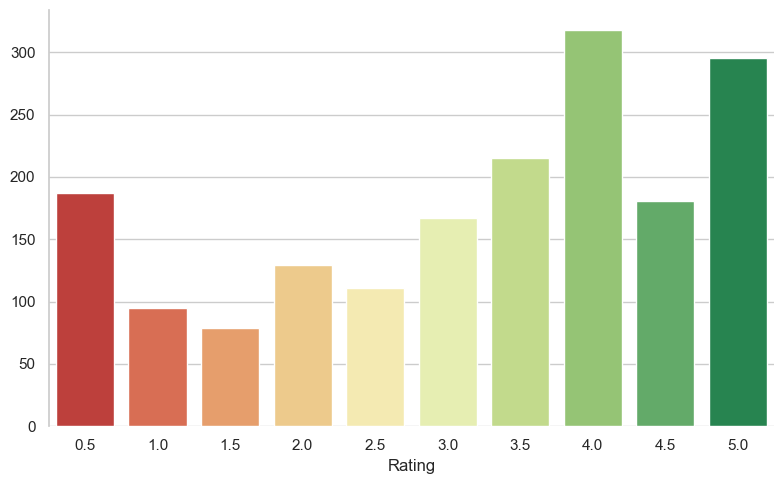

In [11]:
# Ratings
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=10)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='rating', palette=goodbad_palette)
ax.set(xlabel='Rating', ylabel='')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
#fig.savefig('img/rating_counts.png', dpi=200)

In [12]:
def find_polarity(row):
    if row['rating'] <= 2.0:
        return -1
    elif row['rating'] >= 4.0:
        return 1
    else:
        return 0

allocine_df['polarity'] = allocine_df.apply(lambda row : find_polarity(row), axis=1) 

/var/folders/3t/q986tyj15hgcphmh66bl9n340000gn/T/ipykernel_2363/1007430402.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=allocine_df, x='polarity', palette=goodbad_palette)
/var/folders/3t/q986tyj15hgcphmh66bl9n340000gn/T/ipykernel_2363/1007430402.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])


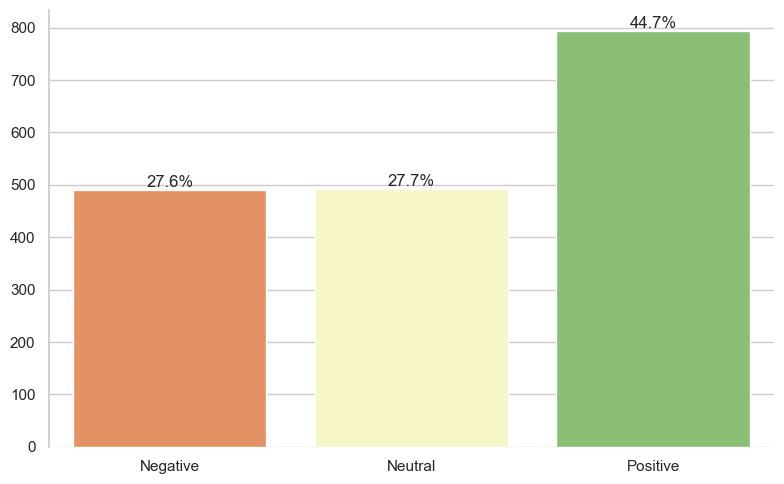

In [13]:
plt.figure(figsize=(8,5))

goodbad_palette = sns.color_palette("RdYlGn_r", n_colors=3)
goodbad_palette.reverse()

ax = sns.countplot(data=allocine_df, x='polarity', palette=goodbad_palette)
ax.set(xlabel='', ylabel='')
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])

# Frenquencies
ncount = len(allocine_df)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
#fig.savefig('img/polarity_frequency.png', dpi=200)

/var/folders/3t/q986tyj15hgcphmh66bl9n340000gn/T/ipykernel_2363/3155840454.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))


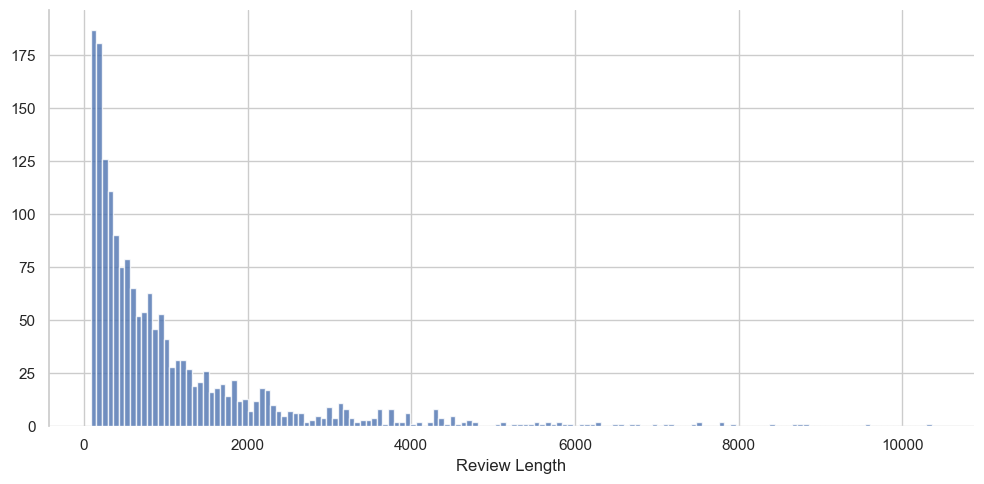

In [14]:
reviews_length = allocine_df['review'].str.len()

plt.figure(figsize=(10,5))
ax = sns.distplot(reviews_length, bins=150, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
#fig.savefig('img/reviews_length.png', dpi=200)

In [15]:
THRESHOLD = 2000
short_reviews = allocine_df[allocine_df['review'].str.len() <= THRESHOLD]
long_reviews =  allocine_df[allocine_df['review'].str.len() > THRESHOLD]

print("{} reviews with LEN > {} ({:.2f} % of total data)".format(
    len(long_reviews),
    THRESHOLD,
    100 * len(long_reviews) / len(allocine_df)
))

257 reviews with LEN > 2000 (14.46 % of total data)


In [16]:
long_reviews.head(1)

,film-url,rating,review,date,helpful,unhelpful,polarity
2,http://www.allocine.fr/film/fichefilm-265567/critiques/spectateurs,3.5,"Allez soyons franc, « 1917 » est un film de guerre maîtrisé de bout en bout qui vaut son pesant de popcorn. Certains diront blockbuster, d’autres film froid qui retrace sans empathie l’expérience de nos ancêtres… personnellement j’opterais pour film à budget moyen qui se démarque en utilisant une technique certes déjà connue et utilisée, mais une technique quand même : le plan séquence. Sam Mendes avait sans doute l’envie de nous faire vivre en temps réel une mission clé de la survie des troupes alliés lors de la Grande Guerre. C’est réussi. La reconstitution des décors et des costumes est tout simplement splendide. Nous sommes immergés dans un no-man’s land des plus terrifiants et authentiques et nous suivons une course contre la montre qui s’apparente à du suicide.<br/><br/>« 1917 » est donc une bonne retranscription composée de maîtrise historique et technique. Sam Mendes l’a d’ailleurs souligné dans une de ses interviews : « Très peu de films évoquent la Première Guerre Mondiale car c’est une guerre immobile qui consistait à attendre des jours et des jours dans les tranchées pour finalement mourir 200 ou 300 mètres plus loin ». L’originalité de ce film, c’est la singularité d’une petite mission intégrée dans la guerre. Rajouter une petite histoire dans l’histoire.<br/><br/>Contrairement à un film comme « Dunkerque » de Christopher Nolan, « 1917 » ne fait pas un documentaire de la guerre et n’hésite pas à nous donner une dimension héroïque (et ce sans en faire des tonnes non plus). Un homme pour en sauver 1 600 autres, 1 600 autres comme lui. La mission aurait pu être assignée à lui ou à un autre, la finalité aurait été la même. D’où l’importance d’un personnage que l’on suit et qui a un impact tout au long de l’histoire sans pour autant être mis sur un piédestal.<br/><br/>En résumé, « 1917 » est un film prenant et abouti où très peu de défauts peuvent être décelés en termes de technique ou de procédés utilisés. On se croit vraiment sur place avec les poilus. Reste à savoir si c’est un film qui pousse à la réflexion ? Pas nécessairement. Bien entendu on peut repenser aux horreurs de la guerre (villages rasés, faune et flore dévastés) et la souffrance vécue dans les tranchées. Malheureusement ce n’est pas l’objet du film et l’empathie reste assez « légère » dans la narration. Belle claque visuelle toutefois.",2020-01-20,46,32,0


/var/folders/3t/q986tyj15hgcphmh66bl9n340000gn/T/ipykernel_2363/3655083358.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))


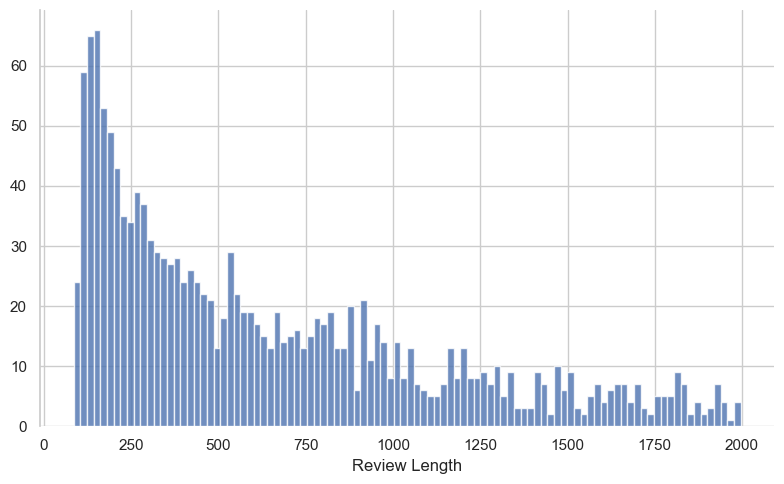

In [17]:
short_reviews_length = short_reviews['review'].str.len()

plt.figure(figsize=(8,5))
ax = sns.distplot(short_reviews_length, bins=100, kde=False, hist_kws=dict(alpha=0.8))
ax.set(xlabel='Review Length')

# Finalize the plot
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)

# Saving plot
fig = ax.get_figure()
#fig.savefig('img/short_reviews_length.png', dpi=200)

In [18]:
dataset_df = allocine_df.copy()
initial_len = len(dataset_df)
print("Length: {}".format(initial_len))

Length: 1777


In [19]:
def loss_percentage(df, previous_length):
    new_length = len(df)
    percentage = 100*(1-(new_length/previous_length))    
    return new_length, percentage  

In [20]:
# 1. Drop columns we don't need
dataset_df = dataset_df.drop(columns=['rating', 'date', 'helpful', 'unhelpful'])

# 2. Drop rows we don't need (neutral polarity)
dataset_df = dataset_df[dataset_df['polarity'] != 0]
length, percentage = loss_percentage(dataset_df, initial_len)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 3. Remove long reviews
LENGTH_THRESH = 2000
dataset_df = dataset_df[dataset_df['review'].str.len() <= LENGTH_THRESH]
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))

# 4. Limit number of reviews per film
"""
MAX_REVIEWS_PER_FILM = 30
grouped = dataset_df.groupby('film-url')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_FILM:
        sampling_size = num_reviews - MAX_REVIEWS_PER_FILM
        ids_to_drop = random.sample(list(ids), sampling_size)
        dataset_df = dataset_df.drop(ids_to_drop)
        
length, percentage = loss_percentage(dataset_df, length)
print("Length: {} (-{:.1f} %)".format(length, percentage))
"""
# Total loss
length, percentage = loss_percentage(dataset_df, initial_len)
print("Total loss: (-{:.1f} %)".format(percentage))

Length: 1284 (-27.7 %)
Length: 1120 (-12.8 %)
Total loss: (-37.0 %)


In [21]:
# Change -1 to 0 for negative polarity
dataset_df.loc[dataset_df['polarity'] == -1, 'polarity'] = 0

In [22]:
dataset_df.groupby('polarity').size()

polarity
0    431
1    689
dtype: int64

In [23]:
import re

def clean_text(text):
    text = text.replace('\xa0', ' ')
    text = text.replace('\x92', "'")
    
    # Substituting multiple spaces with single space
    # Also remove '\n' and '\r' occurences
    text= re.sub(r'\s+', ' ', text, flags=re.I)
    
    return text
 
dataset_df['review'] = dataset_df['review'].apply(clean_text)

In [24]:
# Remove reviews with less than 3 characters
# Done after text processing on purpose
dataset_df = dataset_df[dataset_df['review'].str.len() > 2]

In [25]:
dataset_df.sample(5, random_state=42)

,film-url,review,polarity
402,http://www.allocine.fr/film/fichefilm-172048/critiques/spectateurs,"Que retenir de ce troisième volet des BAD BOYS ? Pas grand-chose, cascades et fusillades à tous va et humour orienté en dessous de la ceinture ; de plus le scénario est faiblard. Dés la première scène,le duo roule en porche à fond dans la ville puis dans le sable pour aller la maternité<br/>, le ton du film est donné, la suite est on comprend que la suite va être long, très long...",0
163,http://www.allocine.fr/film/fichefilm-267951/critiques/spectateurs,"Un très bon film français, j ai adoré les acteurs, surtout Alex, les paysages, le scénario, j ai eu et j ai pleuré d émotion , bref rien à redire pour ma part, pas de caricature ni de mièvrerie, que du plaisir à regarder.",1
1555,http://www.allocine.fr/film/fichefilm-262493/critiques/spectateurs,"Deux acteurs magnifiques mais pour quoi faire ? Que veut-on nous dire avec ce huis clos fantasmatique ? Sur les rapport maître/esclave, Joseph Losey avait fait dix fois mieux, avec The Servant. La réalisation est prétentieuse, des plans interminables sur les mécanismes du phare, les détails d'une table, d'une bouteille. C'est long, très long, redondant, il faut s'accrocher pour rester jusqu'au bout. A éviter.",0
1690,http://www.allocine.fr/film/fichefilm-264228/critiques/spectateurs,C'est un film engagé qui nous est donné à voir. Il y a une réelle réflexion sur le monde politique et de sa place et action dans le monde en pleine mutation avec les enjeux de disparition des ressources naturelles. Le duo Demoustier / Luchini est savoureux. La comédienne nous montre une palette d'émotions intéressante. La bande-annonce n'était qu'un trailer ce qui est de plus en plus rare dans une période où tout est dévoilé trop tôt. Hamzaoui a une rôle dont elle s'acquitte bien. Je recommande ce film,1
842,http://www.allocine.fr/film/fichefilm-232013/critiques/spectateurs,"Ce film est à mettre en miroir avec le premier Jack Reacher sorti en 2012. On a un héros viril, armé, qui est confronté à une enquête compliquée, dangereuse, où l'on ne sait pas exactement qui est derrière le traquenard, et ce, dans un Nord-Est américain à l'allure très industrielle, un peu désabusée. Tout comme Reacher, le héros est un ancien militaire, mais ici il est devenu expert comptable, et surtout c'est un homme né avec le syndrome d'Asperger, un autiste. Ben Affleck joue avec excellence, cet acteur qui jouait mal dans ses jeunes années (Armageddon) est maintenant un monstre sacré. Gone Girl, Batman V Superman, Argo, et maintenant Mr Wolff, il s'illustre dans un certain équilibre entre émotion et froideur dans l'action brute. La façon de filmer fait très film d'auteur, là où Jack Reacher est plutôt dans les canons du polar hollywoodien. J'ai entendu les gens rire souvent dans la salle, en effet certaines scènes étaient cocasses autour du personnage de Ben Affleck et de son autisme mêlé à une virilité brute, bien que moi-même je n'ai pas trouvé que ce soit forcément un film comique. Mention spéciale à la belle Anna Kendrick, et à JK Simmons en haut fonctionnaire réfléchi et calculateur et Jon bernthal excellent comme d'habitude. Une très bonne surprise.",1


In [26]:
min_num = min(dataset_df.groupby('polarity').size())
min_num
# The overall distribution of labels is balanced (100k pos and 100k neg).
# We don't have to have train and testset perfectly balanced

balanced_df = dataset_df.copy()

MAX_REVIEWS_PER_POLARITY = min_num # ~ 100000
# 4. Limit number of reviews per film
grouped = balanced_df.groupby('polarity')
for ids in grouped.groups.values():
    num_reviews = len(ids)    
    if num_reviews > MAX_REVIEWS_PER_POLARITY:
        sampling_size = num_reviews - MAX_REVIEWS_PER_POLARITY
        ids_to_drop = random.sample(list(ids), sampling_size)
        balanced_df = balanced_df.drop(ids_to_drop)

print(balanced_df.groupby('polarity').size())
balanced_df.sample(10, random_state=42)

polarity
0    431
1    431
dtype: int64


,film-url,review,polarity
1461,http://www.allocine.fr/film/fichefilm-263899/critiques/spectateurs,"J’ai trouvé ce drame vraiment super. On ressent l’œuvre faite humblement avec le cœur. Cela m’a beaucoup parlé, tant par sa forme simple et épurée, que par son fond touchant. L’histoire peut paraître banale, mais elle est à l’image de la vie. Il y aura le personnage d'Ulysse, qui est attachant. On va voir son cas et la manière dont il va devoir combattre alors qu’il se sent abandonné par la société. C’est un vrai drame social. Est-ce que ce jeune homme fait les bons choix ? Mais peut-il vraiment faire autrement ? J’ai trouvé pertinent toutes les interrogations que soulève sa condition, celle de sa mère et la manière dont il veut arranger les choses. Cette histoire se tient bien et respire l’authenticité. On voit que la réalisatrice maitrise son sujet. Sandor Funtek interprète merveilleusement bien se rôle. Il m’a vraiment ému et j’ai compris son désespoir. Il faut aussi saluer Sandrine Bonnaire qui est bluffante dans sa prestation de la mère. J’ai aussi beaucoup apprécié Alexis Manenti. Il m’avait déjà impressionné il y a quelques mois dans LES MISÉRABLES. C’est donc véritablement complet car au-delà de la problématique, il va se passer quelques événements pour dynamiser le tout.",1
1225,http://www.allocine.fr/film/fichefilm-268136/critiques/spectateurs,"C'est très long, trop long. Il ne se passe rien, on attend quelque chose de plus fort, de plus intense.<br/>C'est dommage car il y a de bons moments avec les psys respectifs ou le magasin mais ça se limite à ça.",0
256,http://www.allocine.fr/film/fichefilm-138087/critiques/spectateurs,"le comédien et réalisateur Edward Norton nous propose un film noir vraiment excellent. la qualité de la réalisation est au rendez-vous..si en plus vous aimé cette ambiance année après guerre, grosses américaines (voiture), Jazz et suspens sur une histoire politico-mafieuse..alors je vous promets que vous allez passer un bon moment de vrai cinoche au sens noble du terme.ps : le casting en plus fait l'affaire.",1
444,http://www.allocine.fr/film/fichefilm-271733/critiques/spectateurs,"Entre 1967 et 1968, nous allons nous immiscer dans la vie d'une école de l'est de la France formant de futures femmes au foyer ""parfaites"".<br/>Le souci, c'est que l'époque est en plein chamboulement, la révolution féminine (entre autre) est en marche...<br/>Tout n'est pas mauvais dans cette comédie gentillette dans laquelle la caricature de l'épouse modèle des années 1960 est largement appuyée, le souci c'est que ce n'est pas vraiment drôle, on frôle même souvent le lourd ou le grotesque, le dernier quart d'heure en est la parfaite illustration !<br/>En conclusion : de bons comédiens, un thème principal engageant, mais un scénario totalement plat dans une ambiance générale frôlant dangereusement le loufoque.<br/>Sans grand intérêt.<br/>Site cinemadourg.free.fr",0
747,http://www.allocine.fr/film/fichefilm-266257/critiques/spectateurs,Je n ai pas vu la problématique se la toxicité de la masculinité scolaire ; juste des tranches de vie dans un lycée ordinaire.<br/>Je n ai vu que les questions que se pose un frèrene pouvant plus être le jeune frère de son aîné (car décédé) et qui n est pas encore le grand frère que son cadet (car pas encore né).<br/>Processus poussant Tom à se questionner sur le type de modèle qu’il souhaite représentépour son jeune frère ; prenant conscience de la toxicité de ses modèles (père et frère). Il trouve un début de réponse à travers JB et Clarisse (frère et sœur).,1
1667,http://www.allocine.fr/film/fichefilm-55983/critiques/spectateurs,"Relecture Américain du thriller asiatique ""Infernal Affairs"" par Martin Scorsese, The Departed s'avère particulièrement réussi. Il est porté par un luxueux casting, où tous les acteurs sont impeccables, notamment Leonardo DiCaprio et Matt Damon dans les deux rôles principaux, sans oublier la prestation de Jack Nicholson. Le rythme est effréné, dynamisé par un

## Gaussian

In [27]:
reviews = balanced_df["review"]
labels = balanced_df["polarity"]

In [28]:
import re

stop_words_fr = set([
    'et', 'le', 'la', 'les', 'de', 'des', 'du', 'un', 'une', 'en', 'dans', 'que',
    'qui', 'pour', 'par', 'sur', 'avec', 'pas', 'plus', 'ne', 'ce', 'se', 'au',
    'aux', 'à', 'est', 'il', 'elle', 'on', 'nous', 'vous', 'ils', 'elles', 'mais',
    'ou', 'donc', 'or', 'ni', 'car', 'comme'
])

def nettoyer_review(text):
    text = text.lower()
    text = re.sub(r"<br\s*/?>", " ", text)  # enlever balises HTML
    text = re.sub(r"[^a-zàâçéèêëîïôûùüÿñæœ\s]", "", text)  # enlever caractères spéciaux
    tokens = text.split()
    return [w for w in tokens if w not in stop_words_fr and len(w) > 1]

In [29]:
from gensim.models import KeyedVectors

fasttext_model = KeyedVectors.load_word2vec_format(
    "cc.fr.300.vec/cc.fr.300.vec", 
    encoding='utf8',
    binary=False
)


In [30]:
fasttext_model.save("fasttext_fr.bin")

In [31]:
fasttext_model = KeyedVectors.load("fasttext_fr.bin")

In [ ]:
import numpy as np

def vectoriser_review(tokens, model, dim=300):
    vecteurs = [model[word] for word in tokens if word in model]
    if not vecteurs:
        return np.zeros(dim)
    return np.mean(vecteurs, axis=0)

# Appliquer à tout le dataset
X = np.vstack([vectoriser_review(nettoyer_review(review), fasttext_model) for review in reviews])


In [ ]:
def vectoriser_review_padded(tokens, model, dim=300, max_len=20):
    vecteurs = [model[word] for word in tokens if word in model]
    
    # Tronquer si trop long
    if len(vecteurs) > max_len:
        vecteurs = vecteurs[:max_len]
    # Padding avec des vecteurs nuls
    else:
        vecteurs += [np.zeros(dim)] * (max_len - len(vecteurs))
    
    # Convertir en une seule ligne (flatten)
    return np.array(vecteurs).flatten()

X = np.vstack([
    vectoriser_review_padded(nettoyer_review(review), fasttext_model)
    for review in reviews
])

In [55]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=20, covariance_type='full', random_state=42)
gmm.fit(X)
labels_pred = gmm.predict(X)
balanced_df['cluster'] = labels_pred

mapping = {}

for cluster in np.unique(labels_pred):
    dominant_class = balanced_df[balanced_df['cluster'] == cluster]['polarity'].mode()[0]
    mapping[cluster] = dominant_class

balanced_df['cluster_merged'] = balanced_df['cluster'].map(mapping)

In [56]:
from sklearn.metrics import accuracy_score

results = {}

for cov_type in ['full', 'tied', 'diag', 'spherical']:
    gmm = GaussianMixture(n_components=2, covariance_type=cov_type, random_state=42)
    gmm.fit(X)
    labels_pred = gmm.predict(X)
    
    # Corriger si les labels sont inversés
    acc = max(
        accuracy_score(labels, labels_pred),
        accuracy_score(labels, 1 - labels_pred)
    )
    results[cov_type] = acc

for k, v in results.items():
    print(f"{k} → accuracy : {v:.4f}")


full → accuracy : 0.5244
tied → accuracy : 0.5244
diag → accuracy : 0.5348
spherical → accuracy : 0.5499


In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Ajuster les labels si besoin (on peut inverser les clusters si nécessaires)
acc = accuracy_score(labels, balanced_df['cluster_merged'])
conf = confusion_matrix(labels, balanced_df['cluster_merged'])

print("Accuracy :", acc)
print("Matrice de confusion :\n", conf)


Accuracy : 0.5464037122969838
Matrice de confusion :
 [[344  87]
 [304 127]]


In [58]:
balanced_df.head()

,film-url,review,polarity,cluster,cluster_merged
1,http://www.allocine.fr/film/fichefilm-265567/critiques/spectateurs,"""Oh non, encore un film de guerre fait par les américains"" me suis-je dit instinctivement avant d'aller voir ""1917"". Mais bon, avec Sam Mendes aux commandes, il y a de quoi s'y risquer... et quels risques ! Je ne m'attendais pas à être autant ""embrigadé"" par le film. Le dispositif du (faux) plan-séquence qui s'étale sur deux heures est immersif au possible et m'a mis en apnée à plusieurs reprises. Pour ceux qui ne vont pas souvent au cinéma, je pense que ""1917"" gagne vraiment à être vu sur grand écran ; c'est du grand spectacle, furieux et magistral ! L'histoire, inspirée des récits du grand-père du réalisateur, raconte la mission périlleuse de deux soldats anglais qui consiste à passer en territoire ennemi afin de livrer un message vital qui sauvera la vie de milliers d'hommes. Le dispositif de Mendes s'articule autour de ce scénario et s'engage à plonger le spectateur dans l'action en ne lâchant jamais les deux protagonistes de vue : George MacKay et Dean-Charles Chapman font d'ailleurs preuve d'une endurance et d'une candeur remarquables. On est très près de leurs corps, avec une musique prégnante et intense, avec des mouvements de caméra absolument dingues, une multitude de décors racontant chacun une page de ce périple mais aussi un nombre incalculable de figurants et d'effets... Bref, une apothéose de cinéma qui transcende et secoue ! On a là une belle prouesse technique et cinématographique qui nous en met plein les yeux et nous donne l'impression d'être sur une montagne-russe... Je suis sorti de la salle éprouvé, comme si j'avais moi aussi parcouru cette longue distance avec les personnages. Cette expérience sensorielle est rare, surtout lorsque l'aspect technique met en valeur l'histoire et vice-versa. Bien entendu, aborder les tranchées de la Première Guerre mondiale fait écho à d'autres, plus récentes, et en cela, Sam Mendes assure un coup de maitre en évitant toute morale et en privilégiant les émotions fortes pour rendre hommage aux héros de guerre.",1,16,0
3,http://www.allocine.fr/film/fichefilm-265567/critiques/spectateurs,"Après “American Beauty” ou les deux derniers James Bond “Skyfall” et “Spectre”, Sam Mendes nous emporte dans les tranchées de la Première Guerre Mondiale aux côtés de deux comédiens méconnus. “1917” va suivre deux jeunes soldats britanniques qui se voient assigner une mission suicidaire, celle de traverser le no man’s land et les lignes ennemies pour délivrer un message aux environs d’Ecoust-Saint-Mein qui permettra de sauver 1 600 soldats avant qu’ils ne tombent dans un piège tendu par l’armée allemande. Le réalisateur nous offre une expérience totalement immersive grâce à un faux plan séquence de deux heures. Ce défi technique qui nous rappelle “Birdman” n’avait jamais été fait sur un film de guerre. Oppressant à tout instant, le film déjoue l’épreuve de la temporalité et le spectateur aura l’impression de passer une journée entière en territoire hostile. George MacKay et Dean-Charles Chapman crèvent littéralement l’écran et nous font prendre conscience de l’engagement des soldats à servir notre nation. Bouleversant de bout en bout, la musique épique de Thomas Newman accentue l’importance d’une oeuvre qui restera dans nos mémoires pour longtemps.<br/>D'autres critiques sur notre page Facebook : Cinéphiles 44 et notre site cinephiles44.com",1,4,0
7,http://www.allocine.fr/film/fichefilm-265567/critiques/spectateurs,"La première singularité du film est d'être tourné comme un unique plan séquence de près de 2h. En vérité ce système est loin d'être innovant, on peut ainsi citer des films comme ""La Corde"" (1948) de Hitchcock ou ""Snake Eyes"" (1998) de De Palma, ce qui ne gâche en rien la gageure d'un tel parti pris ! En effet, on reste bluffé par le concept où on suit les deux soldats à travers les tranchées, le no man's land, le front de par et d'autre sans discontinu

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_pca = PCA(n_components=5).fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 4], X_pca[:, 2], c=labels_pred, cmap="coolwarm", alpha=0.6)
plt.title("Clusters GMM sur les reviews vectorisées avec FastText")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()